In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
### EPV = Expected Possession Value ,  xT = Expected Threat

In [3]:
TYPE = input(print('Choose xT or EPV : '))

Choose xT or EPV : 
NonexT


In [4]:
TYPE

'xT'

In [6]:
#Choose either EPV or xT as type
#TYPE = input(print('Choose xT or EPV : '))
if TYPE == "xT":    
    with open("expected_threat.json", "r") as f:
        xtd = json.load(f) 
    xtd = np.array(xtd)
elif TYPE == "EPV":
    xtd = pd.read_csv("EPV_grid.csv").to_numpy()

In [7]:
n_rows, n_cols = xtd.shape
print(n_rows, n_cols)

8 12


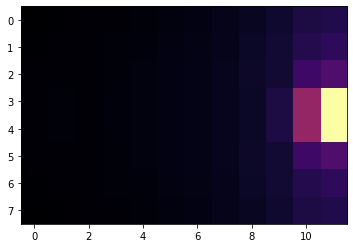

In [8]:
#Display the xT map
plt.imshow(xtd, cmap="inferno");

In [9]:
np.random.seed(42)

pass_df = pd.DataFrame(np.random.random((100, 4))*100, columns=['x1', 'x2', 'y1', 'y2']) ##fake pass data coordinates
pass_df.head()

,x1,x2,y1,y2
0,37.454012,95.071431,73.199394,59.865848
1,15.601864,15.599452,5.808361,86.617615
2,60.111501,70.807258,2.058449,96.990985
3,83.244264,21.233911,18.182497,18.340451
4,30.424224,52.475643,43.194502,29.122914


In [10]:
### Bin the data according to the shape of the loaded xt array
###assuming 100 is the upper maximum limit
pass_df['x1_bin'] = pass_df.x1.apply(lambda val: int(val/(100/n_cols)) if val != 100 else int(val/(100/n_cols)) - 1 )
pass_df['x2_bin'] = pass_df.x2.apply(lambda val: int(val/(100/n_cols)) if val != 100 else int(val/(100/n_cols)) - 1 )

pass_df['y1_bin'] = pass_df.y1.apply(lambda val: int(val/(100/n_rows)) if val != 100 else int(val/(100/n_rows)) - 1 )
pass_df['y2_bin'] = pass_df.y2.apply(lambda val: int(val/(100/n_rows)) if val != 100 else int(val/(100/n_rows)) - 1 )

In [11]:
pass_df.head()

,x1,x2,y1,y2,x1_bin,x2_bin,y1_bin,y2_bin
0,37.454012,95.071431,73.199394,59.865848,4,11,5,4
1,15.601864,15.599452,5.808361,86.617615,1,1,0,6
2,60.111501,70.807258,2.058449,96.990985,7,8,0,7
3,83.244264,21.233911,18.182497,18.340451,9,2,1,1
4,30.424224,52.475643,43.194502,29.122914,3,6,3,2


In [12]:
### Now we just loop over every row and get correspoding xt value for the pass's start and end bins
pass_df['start_zone_value'] = pass_df[['x1_bin', 'y1_bin']].apply(lambda x: xtd[x[1]][x[0]], axis=1)
pass_df['end_zone_value'] = pass_df[['x2_bin', 'y2_bin']].apply(lambda x: xtd[x[1]][x[0]], axis=1)

In [13]:
pass_df.head()

,x1,x2,y1,y2,x1_bin,x2_bin,y1_bin,y2_bin,start_zone_value,end_zone_value
0,37.454012,95.071431,73.199394,59.865848,4,11,5,4,0.012692,0.257454
1,15.601864,15.599452,5.808361,86.617615,1,1,0,6,0.007796,0.008786
2,60.111501,70.807258,2.058449,96.990985,7,8,0,7,0.017451,0.021221
3,83.244264,21.233911,18.182497,18.340451,9,2,1,1,0.029533,0.009424
4,30.424224,52.475643,43.194502,29.122914,3,6,3,2,0.011324,0.016856


In [14]:
pass_df['pass_xt_value'] = pass_df['end_zone_value'] - pass_df['start_zone_value'] ##value of any pass = value at end zone - value at start zone
pass_df = pass_df[[col for col in pass_df.columns if 'bin' not in col]] ##removing the bins as they are not required

In [15]:
pass_df.head()

,x1,x2,y1,y2,start_zone_value,end_zone_value,pass_xt_value
0,37.454012,95.071431,73.199394,59.865848,0.012692,0.257454,0.244762
1,15.601864,15.599452,5.808361,86.617615,0.007796,0.008786,0.000990
2,60.111501,70.807258,2.058449,96.990985,0.017451,0.021221,0.003771
3,83.244264,21.233911,18.182497,18.340451,0.029533,0.009424,-0.020109
4,30.424224,52.475643,43.194502,29.122914,0.011324,0.016856,0.005532
